# CLUSTERING
### Load default functions
Note that you can save all usual python code I use in all lectures are just saved in the **default-functions.py** file,  
which I just load by running 

`%run default-functions.py`

In [81]:
%run default-functions.py

# Iris Dataset
Clustering examples using the iris dataset

In [82]:
#Loading the data
iris = datasets.load_iris() #iris is a pre-saved dataset that is part of many libraries
iris = pd.DataFrame(iris.data)
iris.columns = datasets.load_iris().feature_names
features = datasets.load_iris().target_names
iris['species'] = datasets.load_iris().target
iris['species_name'] =  [features[x] for x in iris['species']]

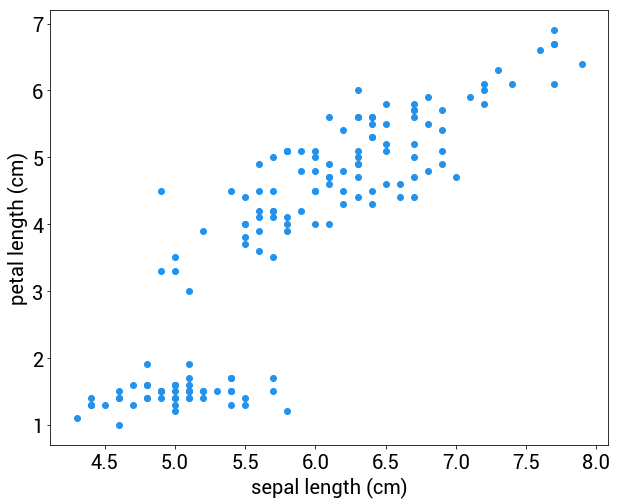

In [83]:
#Plot sample data
feature1 = 'sepal length (cm)'
feature2 = 'petal length (cm)'
label = 'species'
plt.figure(figsize=(10,8))
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.scatter(x = iris[feature1], y =iris[feature2], color = col[2])
plt.show()

#### K-Means Demo

/Users/magtanggoldg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


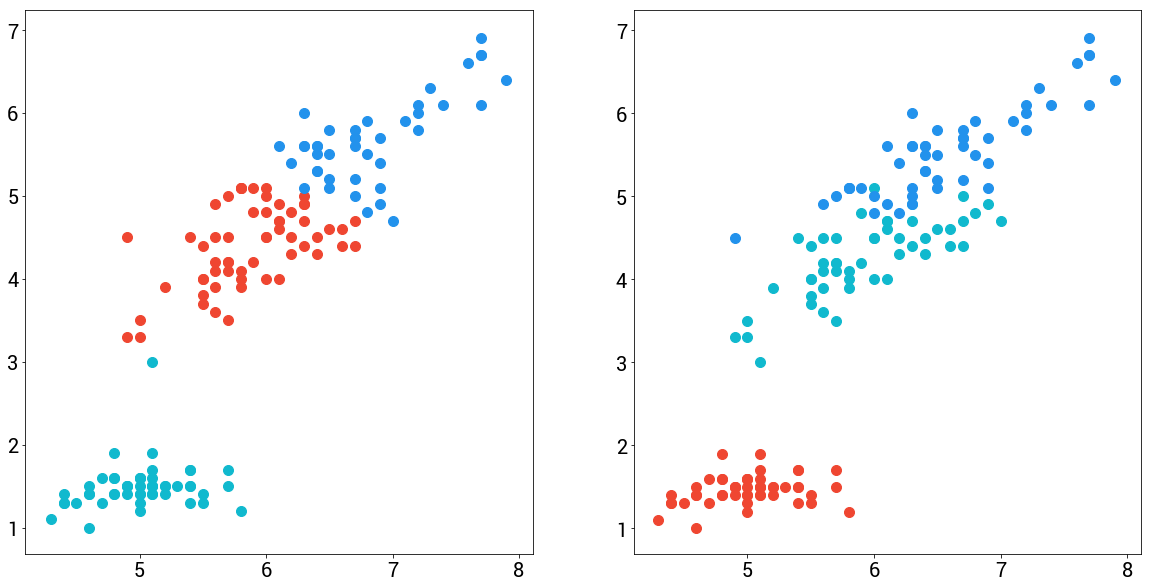

In [84]:
from sklearn.cluster import KMeans
feature1 = 'sepal length (cm)'
feature2 = 'petal length (cm)'

#Get the features to use for clustering
temp_df = iris[[feature1, feature2]]

f, ax = plt.subplots(1, 2, figsize=(20,10))

#Initialize a K-means model with 3 clusters
clust = KMeans(n_clusters = 3)

#Fit the model using the data
clust.fit(temp_df)

#Get the predicted clusters using model.predict
temp_df['cluster'] = clust.predict(temp_df)

#Compare the predicted versus actual
plot_scatter_2d(temp_df, feature1, feature2, 'cluster', ax[0])
plot_scatter_2d(iris, feature1, feature2, 'species', ax[1])

#### Compare the clustering results using different cluster numbers


/Users/magtanggoldg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


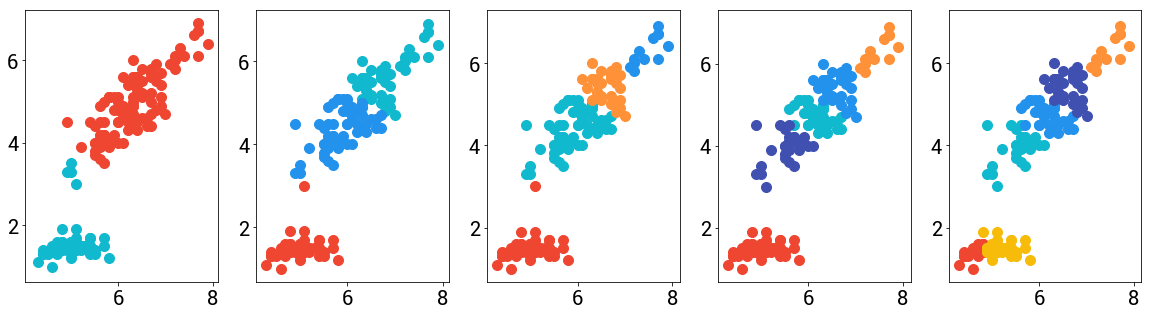

In [85]:
feature1 = 'sepal length (cm)'
feature2 = 'petal length (cm)'
temp_df = iris[[feature1, feature2]]
inert = {}
f, ax = plt.subplots(1, 5, figsize=(20,5))
for i in range(2, 7):
    clust = KMeans(n_clusters = i)
    clust.fit(temp_df)
    temp_df['cluster'] = clust.predict(temp_df)
    plot_scatter_2d(temp_df, feature1, feature2, 'cluster', ax[i-2])
    
    inert[i] = clust.inertia_
    
plt.show()

#### Create the Elbow chart showing the different distances at different cluster numbers. 

/Users/magtanggoldg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


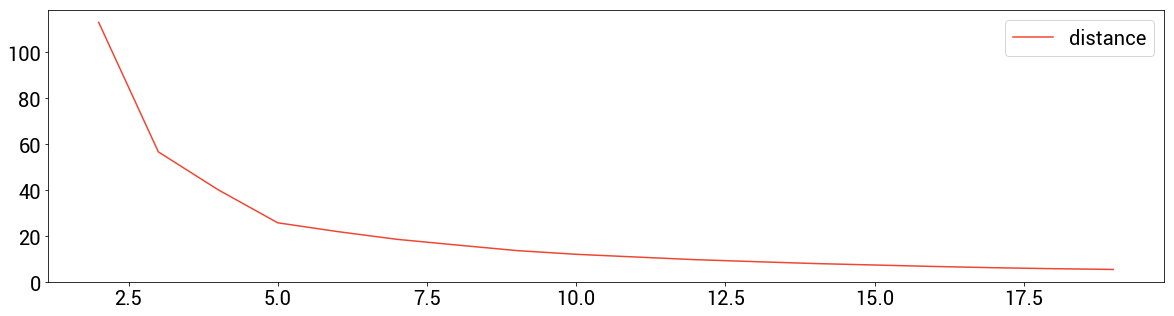

In [86]:
feature1 = 'sepal length (cm)'
feature2 = 'petal length (cm)'
temp_df = iris[[feature1, feature2]]
inert = {}
for i in range(2, 20):
    clust = KMeans(n_clusters = i)
    clust.fit(temp_df)
    temp_df['cluster'] = clust.predict(temp_df)
    inert[i] = clust.inertia_

pd.DataFrame({'distance':inert}).plot(figsize=(20,5), color = col[0])

#### Agglomerative Sample

In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster

In [88]:
#Creates a linkage matrix that will be used for the graphing of the dendrogram
Z = linkage(iris[[feature1, feature2]],'centroid', metric = 'euclidean', optimal_ordering=True) 

#Get the total distance of the clustering result
c, coph_dists = cophenet(Z, pdist(iris[[feature1, feature2]]))
c

0.87616532785810541

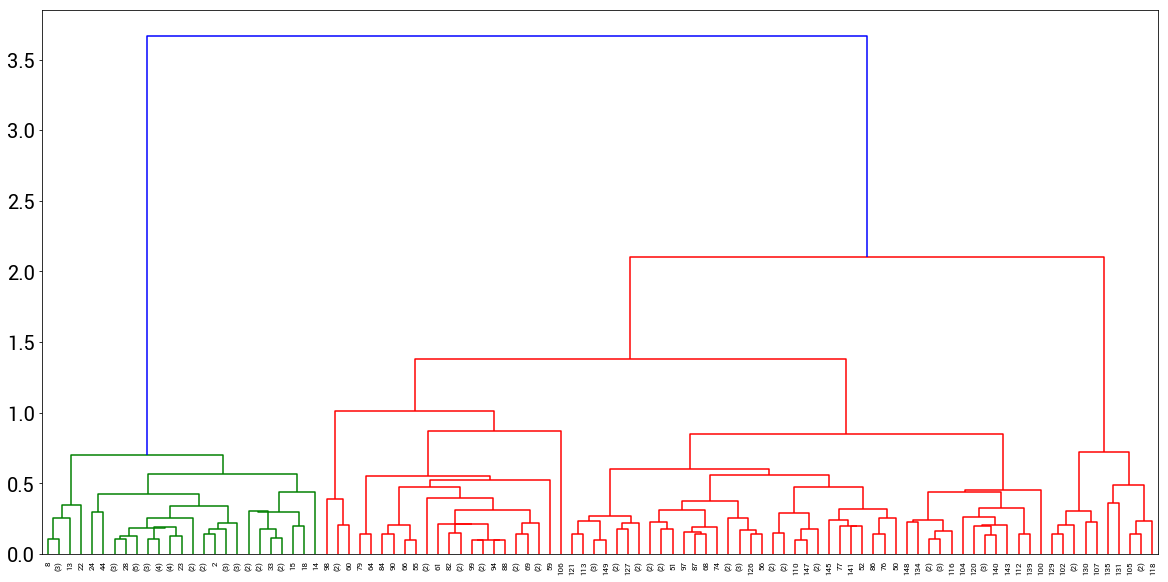

In [89]:
#Plot the dendrogram!
fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z,  p = 100, truncate_mode='lastp', leaf_rotation=90,leaf_font_size=8)
plt.show()

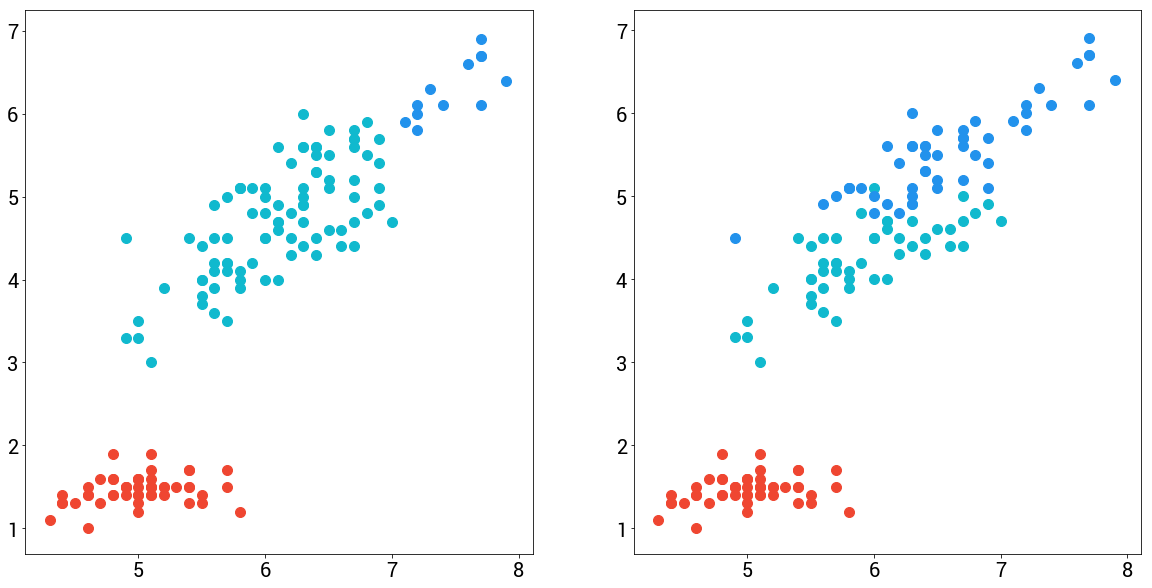

In [90]:
#Cutting off the dendrogram at t = 1.5 to limit it only to 3 clusters
temp_df = iris
temp_df['cluster'] = fcluster(Z, t = 1.5, criterion = 'distance')

f, ax = plt.subplots(1, 2, figsize=(20,10))
plot_scatter_2d(temp_df, feature1, feature2, 'cluster', ax[0])
plot_scatter_2d(iris, feature1, feature2, 'species', ax[1])

# DAILY KOS Dataset

In [91]:
clust_df = pd.read_csv('https://raw.githubusercontent.com/magtanggol03/dec130/master/datasets/Analytics%20Edge/DailyKos.csv')
stop_words = [re.sub(r'[^\w\s]','',x) for x in stopwords.words('english')] + ['yeah']
clust_df = clust_df.drop(clust_df.columns[[x in stop_words for x in clust_df.columns]], axis = 1)

Each row is an article, and the value of each word is the frequency that each word is mentioned in an article

In [92]:
clust_df.head()

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,written,wrong,wrote,yahoo,year,yesterday,york,young,zogby,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0


Perform heirachichal clustering, plot the dendrogram

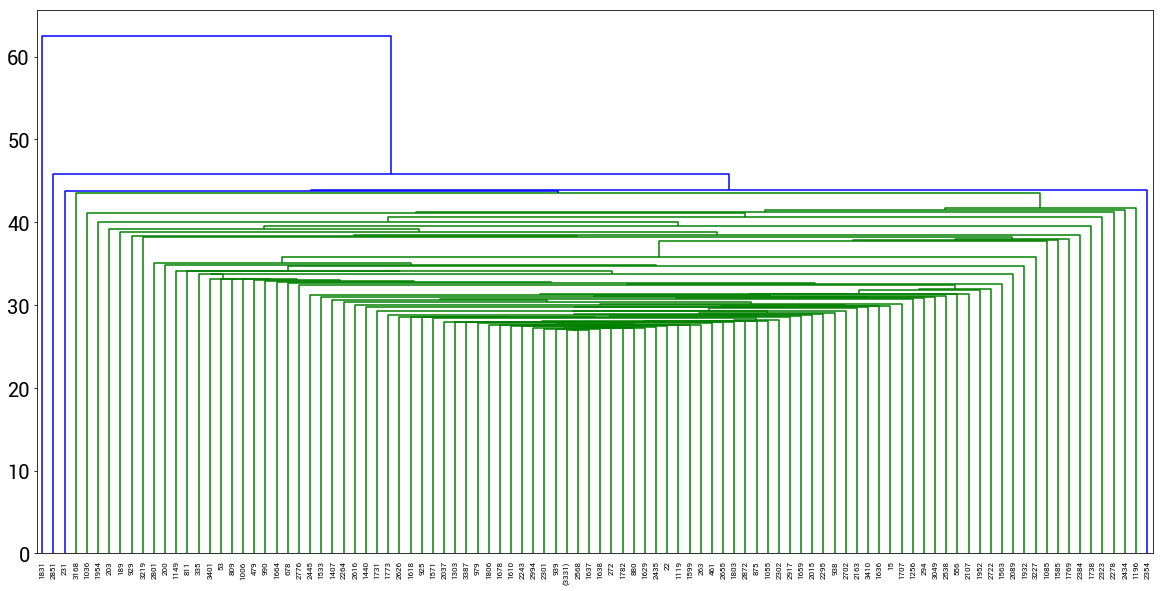

In [95]:
clust_df_short = clust_df
Z = linkage(clust_df_short,metric = 'euclidean', optimal_ordering=True)

fig = plt.figure(figsize=(20, 10))
dn = dendrogram(Z,  p = 100, truncate_mode='lastp', leaf_rotation=90,leaf_font_size=8)
plt.show()

In [96]:
#Limit the clusters to two
clust_df_short['cluster'] = fcluster(Z, t = 2, criterion = 'maxclust')

In [97]:
#Print the first cluster
clust1 = pd.DataFrame(clust_df_short[clust_df_short['cluster'] ==1].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head())
clust1

,0
bush,2.310003
kerry,1.543599
democrat,1.414990
poll,1.405074
november,1.102654


In [98]:
#Print the second cluster
clust2 = pd.DataFrame(clust_df_short[clust_df_short['cluster'] ==2].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head())
clust2

,0
threat,44.0
iraq,30.0
weapon,20.0
presided,20.0
bush,18.0


Perform a K-means clustering on the same dataset

In [99]:
#Compare resulting distances across different values of k
inert = {}
for i in range(2, 20):
    clust = KMeans(n_clusters = i)
    clust.fit(clust_df_short.drop('cluster', axis = 1))
    inert[i] = clust.inertia_

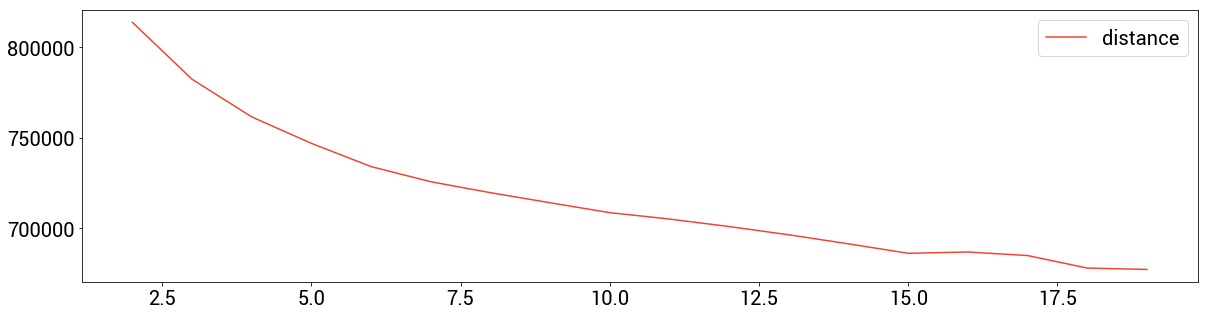

In [100]:
pd.DataFrame({'distance':inert}).plot(figsize=(20,5), color = col[0])

Choose 17 clusters, get the words most frequent in the top 4 clusters

In [101]:
clust = KMeans(n_clusters = 17)
clust.fit(clust_df_short.drop('cluster', axis = 1))
inert[i] = clust.inertia_
clust_df_short['cluster'] = clust.predict(clust_df_short.drop('cluster', axis = 1))
clust_df_short.cluster.value_counts()

16    1386
1      450
10     286
14     239
8      210
12     169
4      160
15     124
9      124
0      100
3       61
7       45
13      31
11      26
5       13
6        5
2        1
Name: cluster, dtype: int64

In [108]:
top = list(clust_df_short.cluster.value_counts().index)

In [105]:
pd.DataFrame(clust_df_short[clust_df_short.cluster == top[0]].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head())

,0
bush,0.622655
democrat,0.591631
elect,0.471861
kerry,0.466089
general,0.443723


In [106]:
pd.DataFrame(clust_df_short[clust_df_short.cluster == top[1]].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head())

,0
bush,4.084444
kerry,2.266667
presided,1.195556
campaign,0.871111
general,0.864444


In [107]:
pd.DataFrame(clust_df_short[clust_df_short.cluster == top[3]].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head())

,0
iraq,3.631799
war,2.535565
bush,2.079498
american,1.602510
iraqi,1.594142


In [109]:
clust_df_short[clust_df_short.cluster == top[4]].drop('cluster', axis = 1).mean(axis = 0).sort_values(ascending = False).head()

poll       5.609524
bush       2.385714
kerry      2.142857
percent    1.504762
voter      1.385714
dtype: float64